目标结果 (x_1, x_2) = (3, 0.5)
优化结果 (x_1, x_2) = (-1.824012, 2.110916)


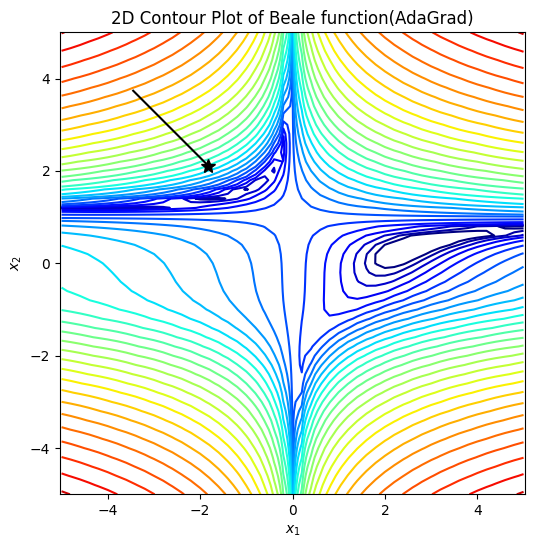

In [1]:
'''自定义AdaGrad优化器函数来实现求解Beale函数的最小值
    G=G+(dJ/dW)^2
    W=W-Eta/(sqrt(G)+eps)*dJ/dW
'''
import random
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl # Matplotlib的色阶条
# ----------定义目标函数beale、目标函数的偏导函数dbeale_dx、优化器函数Optimizer,并画出目标函数----------

#定义beale公式
def beale(x1,x2):
    return (1.5-x1+x1*x2)**2+(2.25-x1+x1*x2**2)**2+(2.625-x1+x1*x2**3)**2

#定义beale公式的偏导函数
def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5-x1+x1*x2)*(x2-1)+2*(2.25-x1+x1*x2**2)*(x2**2-1)+2*(2.625-x1+x1*x2**3)*(x2**3-1)  # 求beale公式关于x1的偏导数
    dfdx2 = 2*(1.5-x1+x1*x2)*x1+2*(2.25-x1+x1*x2**2)*(2*x1*x2)+2*(2.625-x1+x1*x2**3)*(3*x1*x2**2)   # 求beale公式关于x2的偏导数
    return dfdx1, dfdx2

#定义AdaGrad优化器,返回训练过程中的最小值点
def Optimizer():
    Epoch_time=50000
    Eta=0.01
    eps=0.0001
    x_traj=[]
    x1=random.uniform(-5.0,5.2)
    x2=random.uniform(-5.0,5.2)
    G1=0
    G2=0
    x_traj.append([x1,x2])
    # print("Epoch %d: (%f, %f)"%(0,x1,x2))
    for i in range(Epoch_time):
        dfdx1,dfdx2=dbeale_dx(x1,x2)
        G1+=dfdx1*dfdx1
        G2+=dfdx2*dfdx2
        x1-=Eta*dfdx1/(sqrt(G1)+eps)
        x2-=Eta*dfdx2/(sqrt(G2)+eps)
        # while x1<-5 or x1>5:                                #防止超出范围导致正负溢出
        #     x1+=Eta*dfdx1
        #     dfdx1/=2
        #     x1-=Eta*dfdx1
        # while x2<-5 or x2>5:
        #     x2+=Eta*dfdx2
        #     dfdx2/=2
        #     x2-=Eta*dfdx2
        x_traj.append([x1,x2])
        # print("Epoch %d: (%f, %f)"%(i+1,x1,x2))
    return x1,x2,x_traj

#定义画图函数: 等高线图(标出最低点)+优化过程x坐标折线图
def gd_plot(x1,x2,x_traj):
    plt.rcParams['figure.figsize'] = [6, 6]                 # 窗口大小
    plt.contour(X1, X2, Y, levels=np.logspace(0,6,30), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)      # 画等高线图
    plt.title('2D Contour Plot of Beale function(AdaGrad)')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis('equal')                                       # 设置坐标轴为正方形
    plt.plot(x1,x2,'k*',markersize=10)                      # 画出最低点
    if len(x_traj)!=0:                                      # 绘制训练过程中x的取值变化
        x_traj = np.array(x_traj)                           # 将x_traj转为数组
        plt.plot(x_traj[:, 0], x_traj[:, 1], 'k-')          # 以x_traj的第一列为x轴坐标，第二列为y轴坐标进行画图
    plt.show()                                              # 两张图共用plt

step_x1,step_x2 = 0.2, 0.2
X1,X2=np.meshgrid(np.arange(-5,5+step_x1,step_x1),np.arange(-5,5+step_x2,step_x2))                  # 生成从-5到5步长为0.2的网格点(51*51)
Y = beale(X1, X2)                                           # 将x1,x2坐标带入beale公式
x1,x2,x_traj = Optimizer()
print("目标结果 (x_1, x_2) = (3, 0.5)")
print("优化结果 (x_1, x_2) = (%f, %f)"%(x1,x2))
gd_plot(x1,x2,x_traj)

目标结果 (x_1, x_2) = (3, 0.5)
优化结果 (x_1, x_2) = (-16.524623, 1.056950)


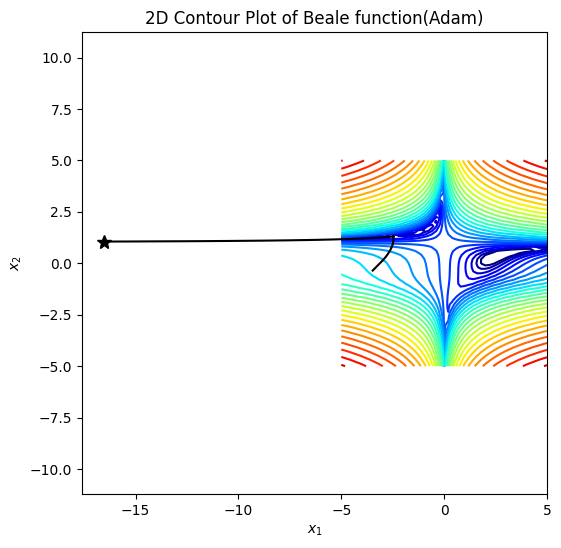

In [5]:
'''自定义RMSProp优化器函数来实现求解Beale函数的最小值
    m=b1*m+(1-b1)*(dJ/dW)
    v=b2*v+(1-b2)*(dJ/dW)^2
    m_=m/(1-b1)
    v_=v/(1-b2)
    W=W-Eta/(sqrt(v_)+eps)*m_
'''
import random
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl # Matplotlib的色阶条
# ----------定义目标函数beale、目标函数的偏导函数dbeale_dx、优化器函数Optimizer,并画出目标函数----------

#定义beale公式
def beale(x1,x2):
    return (1.5-x1+x1*x2)**2+(2.25-x1+x1*x2**2)**2+(2.625-x1+x1*x2**3)**2

#定义beale公式的偏导函数
def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5-x1+x1*x2)*(x2-1)+2*(2.25-x1+x1*x2**2)*(x2**2-1)+2*(2.625-x1+x1*x2**3)*(x2**3-1)  # 求beale公式关于x1的偏导数
    dfdx2 = 2*(1.5-x1+x1*x2)*x1+2*(2.25-x1+x1*x2**2)*(2*x1*x2)+2*(2.625-x1+x1*x2**3)*(3*x1*x2**2)   # 求beale公式关于x2的偏导数
    return dfdx1, dfdx2

#定义Adam优化器,返回训练过程中的最小值点
def Optimizer():
    Epoch_time=3000
    Eta=0.01
    eps=0.0001
    b1=0.9
    b2=0.99
    x_traj=[]
    x1=random.uniform(-5.0,5.2)
    x2=random.uniform(-5.0,5.2)
    m1=0
    m2=0
    v1=0
    v2=0
    x_traj.append([x1,x2])
    # print("Epoch %d: (%f, %f)"%(0,x1,x2))
    for i in range(Epoch_time):
        dfdx1,dfdx2=dbeale_dx(x1,x2)
        m1=b1*m1+(1-b1)*dfdx1
        m2=b1*m2+(1-b1)*dfdx2
        v1=b2*v1+(1-b2)*dfdx1*dfdx1
        v2=b2*v2+(1-b2)*dfdx2*dfdx2
        m1_=m1/(1-b1)
        m2_=m2/(1-b1)
        v1_=v1/(1-b2)
        v2_=v2/(1-b2)
        x1-=Eta*m1_/(sqrt(v1_)+eps)
        x2-=Eta*m2_/(sqrt(v2_)+eps)
        x_traj.append([x1,x2])
        # print("Epoch %d: (%f, %f)"%(i+1,x1,x2))
    return x1,x2,x_traj

#定义画图函数: 等高线图(标出最低点)+优化过程x坐标折线图
def gd_plot(x1,x2,x_traj):
    plt.rcParams['figure.figsize'] = [6, 6]                 # 窗口大小
    plt.contour(X1, X2, Y, levels=np.logspace(0,6,30), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)      # 画等高线图
    plt.title('2D Contour Plot of Beale function(Adam)')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis('equal')                                       # 设置坐标轴为正方形
    plt.plot(x1,x2,'k*',markersize=10)                      # 画出最低点
    if len(x_traj)!=0:                                      # 绘制训练过程中x的取值变化
        x_traj = np.array(x_traj)                           # 将x_traj转为数组
        plt.plot(x_traj[:, 0], x_traj[:, 1], 'k-')          # 以x_traj的第一列为x轴坐标，第二列为y轴坐标进行画图
    plt.show()                                              # 两张图共用plt

step_x1,step_x2 = 0.2, 0.2
X1,X2=np.meshgrid(np.arange(-5,5+step_x1,step_x1),np.arange(-5,5+step_x2,step_x2))                  # 生成从-5到5步长为0.2的网格点(51*51)
Y = beale(X1, X2)                                           # 将x1,x2坐标带入beale公式
x1,x2,x_traj = Optimizer()
print("目标结果 (x_1, x_2) = (3, 0.5)")
print("优化结果 (x_1, x_2) = (%f, %f)"%(x1,x2))
gd_plot(x1,x2,x_traj)


目标结果 (x_1, x_2) = (3, 0.5)
优化结果 (x_1, x_2) = (3.000235, 0.500059)


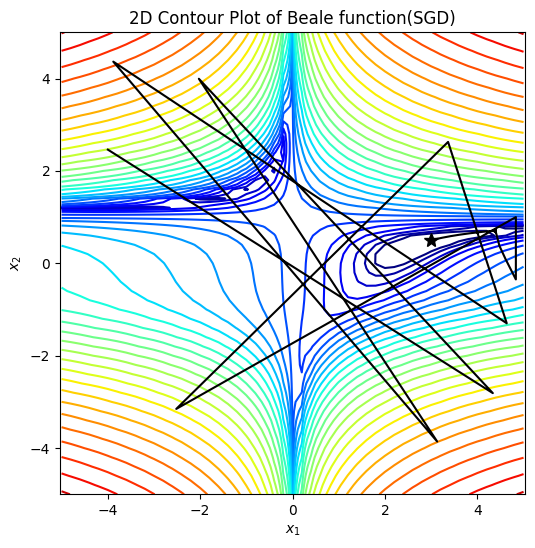

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl # Matplotlib的色阶条
# ----------定义目标函数beale、目标函数的偏导函数dbeale_dx、优化器函数Optimizer,并画出目标函数----------

#定义beale公式
def beale(x1,x2):
    return (1.5-x1+x1*x2)**2+(2.25-x1+x1*x2**2)**2+(2.625-x1+x1*x2**3)**2

#定义beale公式的偏导函数
def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5-x1+x1*x2)*(x2-1)+2*(2.25-x1+x1*x2**2)*(x2**2-1)+2*(2.625-x1+x1*x2**3)*(x2**3-1)  # 求beale公式关于x1的偏导数
    dfdx2 = 2*(1.5-x1+x1*x2)*x1+2*(2.25-x1+x1*x2**2)*(2*x1*x2)+2*(2.625-x1+x1*x2**3)*(3*x1*x2**2)   # 求beale公式关于x2的偏导数
    return dfdx1, dfdx2

#定义SGD优化器,返回训练过程中的最小值点
def Optimizer():
    Epoch_time=4000
    Eta=0.01
    x_traj=[]
    x1=random.uniform(-5.0,5.2)
    x2=random.uniform(-5.0,5.2)
    x_traj.append([x1,x2])
    # print("Epoch %d: (%f, %f)"%(0,x1,x2))
    for i in range(Epoch_time):
        dfdx1,dfdx2=dbeale_dx(x1,x2)
        x1-=Eta*dfdx1
        x2-=Eta*dfdx2
        while x1<-5 or x1>5:                                #防止超出范围导致正负溢出
            x1+=Eta*dfdx1
            dfdx1/=2
            x1-=Eta*dfdx1
        while x2<-5 or x2>5:
            x2+=Eta*dfdx2
            dfdx2/=2
            x2-=Eta*dfdx2
        x_traj.append([x1,x2])
        # print("Epoch %d: (%f, %f)"%(i+1,x1,x2))
    return x1,x2,x_traj

#定义画图函数: 等高线图(标出最低点)+优化过程x坐标折线图
def gd_plot(x1,x2,x_traj):
    plt.rcParams['figure.figsize'] = [6, 6]                 # 窗口大小
    plt.contour(X1, X2, Y, levels=np.logspace(0,6,30), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)      # 画等高线图
    plt.title('2D Contour Plot of Beale function(SGD)')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis('equal')                                       # 设置坐标轴为正方形
    plt.plot(x1,x2,'k*',markersize=10)                      # 画出最低点
    if len(x_traj)!=0:                                      # 绘制训练过程中x的取值变化
        x_traj = np.array(x_traj)                           # 将x_traj转为数组
        plt.plot(x_traj[:, 0], x_traj[:, 1], 'k-')          # 以x_traj的第一列为x轴坐标，第二列为y轴坐标进行画图
    plt.show()                                              # 两张图共用plt

step_x1,step_x2 = 0.2, 0.2
X1,X2=np.meshgrid(np.arange(-5,5+step_x1,step_x1),np.arange(-5,5+step_x2,step_x2))                  # 生成从-5到5步长为0.2的网格点(51*51)
Y = beale(X1, X2)                                           # 将x1,x2坐标带入beale公式
x1,x2,x_traj = Optimizer()
print("目标结果 (x_1, x_2) = (3, 0.5)")
print("优化结果 (x_1, x_2) = (%f, %f)"%(x1,x2))
gd_plot(x1,x2,x_traj)

In [ ]:
'''自定义RMSProp优化器函数来实现求解Beale函数的最小值
    m=b1*m+(1-b1)*(dJ/dW)
    v=b2*v+(1-b2)*(dJ/dW)^2
    m_=m/(1-b1)
    v_=v/(1-b2)
    W=W-Eta/(sqrt(v_)+eps)*m_
'''
import random
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl # Matplotlib的色阶条
# ----------定义目标函数beale、目标函数的偏导函数dbeale_dx、优化器函数Optimizer,并画出目标函数----------

#定义beale公式
def beale(x1,x2):
    return (1.5-x1+x1*x2)**2+(2.25-x1+x1*x2**2)**2+(2.625-x1+x1*x2**3)**2

#定义beale公式的偏导函数
def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5-x1+x1*x2)*(x2-1)+2*(2.25-x1+x1*x2**2)*(x2**2-1)+2*(2.625-x1+x1*x2**3)*(x2**3-1)  # 求beale公式关于x1的偏导数
    dfdx2 = 2*(1.5-x1+x1*x2)*x1+2*(2.25-x1+x1*x2**2)*(2*x1*x2)+2*(2.625-x1+x1*x2**3)*(3*x1*x2**2)   # 求beale公式关于x2的偏导数
    return dfdx1, dfdx2

#定义Adam优化器,返回训练过程中的最小值点
def Optimizer():
    Epoch_time=3000
    Eta=0.01
    eps=0.0001
    b1=0.9
    b2=0.99
    x_traj=[]
    x1=random.uniform(-5.0,5.2)
    x2=random.uniform(-5.0,5.2)
    m1=0
    m2=0
    v1=0
    v2=0
    x_traj.append([x1,x2])
    # print("Epoch %d: (%f, %f)"%(0,x1,x2))
    for i in range(Epoch_time):
        dfdx1,dfdx2=dbeale_dx(x1,x2)
        m1=b1*m1+(1-b1)*dfdx1
        m2=b1*m2+(1-b1)*dfdx2
        v1=b2*v1+(1-b2)*dfdx1*dfdx1
        v2=b2*v2+(1-b2)*dfdx2*dfdx2
        m1_=m1/(1-b1)
        m2_=m2/(1-b1)
        v1_=v1/(1-b2)
        v2_=v2/(1-b2)
        x1-=Eta*m1_/(sqrt(v1_)+eps)
        x2-=Eta*m2_/(sqrt(v2_)+eps)
        x_traj.append([x1,x2])
        # print("Epoch %d: (%f, %f)"%(i+1,x1,x2))
    return x1,x2,x_traj

#定义画图函数: 等高线图(标出最低点)+优化过程x坐标折线图
def gd_plot(x1,x2,x_traj):
    plt.rcParams['figure.figsize'] = [6, 6]                 # 窗口大小
    plt.contour(X1, X2, Y, levels=np.logspace(0,6,30), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)      # 画等高线图
    plt.title('2D Contour Plot of Beale function(Adam)')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis('equal')                                       # 设置坐标轴为正方形
    plt.plot(x1,x2,'k*',markersize=10)                      # 画出最低点
    if len(x_traj)!=0:                                      # 绘制训练过程中x的取值变化
        x_traj = np.array(x_traj)                           # 将x_traj转为数组
        plt.plot(x_traj[:, 0], x_traj[:, 1], 'k-')          # 以x_traj的第一列为x轴坐标，第二列为y轴坐标进行画图
    plt.show()                                              # 两张图共用plt

step_x1,step_x2 = 0.2, 0.2
X1,X2=np.meshgrid(np.arange(-5,5+step_x1,step_x1),np.arange(-5,5+step_x2,step_x2))                  # 生成从-5到5步长为0.2的网格点(51*51)
Y = beale(X1, X2)                                           # 将x1,x2坐标带入beale公式
x1,x2,x_traj = Optimizer()
print("目标结果 (x_1, x_2) = (3, 0.5)")
print("优化结果 (x_1, x_2) = (%f, %f)"%(x1,x2))
gd_plot(x1,x2,x_traj)

In [4]:
'''--------------------导入MindSpore模块和辅助模块--------------------'''
import csv
import os
import time
import numpy as np
from easydict import EasyDict as edict
from matplotlib import pyplot as plt
import mindspore
from mindspore import nn
from mindspore import context
from mindspore import dataset
from mindspore.train.callback import TimeMonitor, LossMonitor
from mindspore import Tensor
from mindspore.train import Model
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig # 回调机制
context.set_context(mode=context.GRAPH_MODE, device_target="Ascend") # 设定运行模式为静态图模式，并且运行设备为昇腾芯片

cfg = edict({
    'data_size': 150,
    'train_size': 120, #训练集大小
    'test_size': 30 , #测试集大小
    'feature_number': 4, #输入特征数
    'num_class': 3, #分类类别
    'batch_size': 30, #批次大小
    'data_dir': 'iris.data', # 数据集路径
    'save_checkpoint_steps': 5, #多少步保存一次模型
    'keep_checkpoint_max': 1, #最多保存多少个模型
    'out_dir_no_opt': './model_iris/no_opt', #保存模型路径，无优化器模型
    'out_dir_sgd': './model_iris/sgd', #保存模型路径,SGD优化器模型
    'out_dir_momentum': './model_iris/momentum', #保存模型路径，momentum模型
    'out_dir_adam': './model_iris/adam', #保存模型路径，adam优化器模型
    'output_prefix': "checkpoint_fashion_forward" #保存模型文件名
})

#鸢尾花数据集，本数据集共有150个带标签的数据
with open(cfg.data_dir) as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))

label_map = {'setosa': 0,'versicolor': 1,'virginica':2 }
#分别获取数据中的特征值X和标签值Y
X = np.array([[float(x) for x in s[:-1]] for s in data[:cfg.data_size]],np.float32)
Y = np.array([label_map[s[-1]] for s in data[:cfg.data_size]], np.int32)

# 将数据集分为训练集120条，测试集30条。
train_idx = np.random.choice(cfg.data_size, cfg.train_size, replace=False)
test_idx = np.array(list(set(range(cfg.data_size)) - set(train_idx)))

X_train, Y_train = X[train_idx], Y[train_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

XY_train = list(zip(X_train, Y_train))
train_dataset = dataset.GeneratorDataset(XY_train, ['x', 'y'])
train_dataset = train_dataset.shuffle(buffer_size=cfg.train_size).batch(cfg.batch_size, drop_remainder=True)
XY_test = list(zip(X_test, Y_test))
test_dataset = dataset.GeneratorDataset(XY_test, ['x', 'y'])
test_dataset = test_dataset.shuffle(buffer_size=cfg.test_size).batch(cfg.test_size, drop_remainder=True)

#定义神经网络和损失函数供模型Model使用
Normal_network = nn.Dense(cfg.feature_number, cfg.num_class)
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")
#调用模型Model，None表示不使用优化器，评价函数采用准确率
Normal = Model(network=Normal_network, loss_fn=net_loss, optimizer=None, metrics={"Acc":nn.Accuracy()})

# 定义回调类用来输出训练过程的信息
ckpt_cb = ModelCheckpoint()
loss_cb = LossMonitor(4)

#训练
print('--------------------无优化器--------------------')
print('==========Start Training==========')
Normal.train(epoch=20,train_dataset=train_dataset, callbacks=[ckpt_cb, loss_cb])

# 模型评估
Acc=Normal.eval(test_dataset)
print(Acc)

# 输出预测结果
test_iter = test_dataset.create_dict_iterator()._get_next() # 构造迭代器
features = Tensor(test_iter['x'], mindspore.float32) # 构造特征张量
predictions = Normal.predict(features) # 预测结果
predictions = predictions.asnumpy() #转换成numpy格式
num2label=['Setosa','Versicolor','Virginica']
for i in range(30):
    sample = predictions[i,:].tolist()
    print('第'+str(i)+'个sample预测结果: ',num2label[sample.index(max(sample))],'    真实结果: ', num2label[test_iter['y'][i]])

--------------------无优化器--------------------
==========Start Training==========
epoch: 1 step: 4, loss is 1.0727592706680298
epoch: 2 step: 4, loss is 1.0729542970657349
epoch: 3 step: 4, loss is 1.1241875886917114
epoch: 4 step: 4, loss is 1.1299529075622559
epoch: 5 step: 4, loss is 1.0875688791275024
epoch: 6 step: 4, loss is 1.1004915237426758
epoch: 7 step: 4, loss is 1.1002249717712402
epoch: 8 step: 4, loss is 1.1315152645111084
epoch: 9 step: 4, loss is 1.119542121887207
epoch: 10 step: 4, loss is 1.1221182346343994
epoch: 11 step: 4, loss is 1.1048390865325928
epoch: 12 step: 4, loss is 1.1066553592681885
epoch: 13 step: 4, loss is 1.1114317178726196
epoch: 14 step: 4, loss is 1.1427360773086548
epoch: 15 step: 4, loss is 1.0995657444000244
epoch: 16 step: 4, loss is 1.0761635303497314
epoch: 17 step: 4, loss is 1.0907174348831177
epoch: 18 step: 4, loss is 1.088503360748291
epoch: 19 step: 4, loss is 1.119629144668579
epoch: 20 step: 4, loss is 1.0882785320281982
{'Acc': 0.36

In [7]:

#定义神经网络、优化器和损失函数供模型 Model 使用
Network = nn.Dense(cfg.feature_number, cfg.num_class)
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")
optimizer=nn.SGD(Network.trainable_params(),learning_rate=0.01)
#调用模型 Model，使用优化器，评价函数采用准确率
model = Model(network=Network, loss_fn=net_loss, optimizer=optimizer,
metrics={"Acc":nn.Accuracy()})    

In [8]:
'''--------------------Momentum 优化器--------------------'''
#定义神经网络、优化器和损失函数供模型 Model 使用
Network = nn.Dense(cfg.feature_number, cfg.num_class)
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")
optimizer=nn.Momentum(Network.trainable_params(),learning_rate=0.01,momentum=
0.9)
#调用模型 Model，使用优化器，评价函数采用准确率
model = Model(network=Network, loss_fn=net_loss, optimizer=optimizer,
metrics={"Acc":nn.Accuracy()})

In [10]:
'''--------------------AdaGrad 优化器--------------------'''
#定义神经网络、优化器和损失函数供模型 Model 使用
Network = nn.Dense(cfg.feature_number, cfg.num_class)
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")
optimizer=nn.Adagrad(Network.trainable_params(),learning_rate=0.01)
#调用模型 Model，使用优化器，评价函数采用准确率
model = Model(network=Network, loss_fn=net_loss, optimizer=optimizer,
metrics={"Acc":nn.Accuracy()})


In [11]:
'''--------------------RMSProp 优化器--------------------'''
#定义神经网络、优化器和损失函数供模型 Model 使用
Network = nn.Dense(cfg.feature_number, cfg.num_class)
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")
optimizer=nn.RMSProp(Network.trainable_params(),learning_rate=0.01)
#调用模型 Model，使用优化器，评价函数采用准确率
model = Model(network=Network, loss_fn=net_loss, optimizer=optimizer,
metrics={"Acc":nn.Accuracy()})


In [12]:
'''--------------------Adam 优化器--------------------'''
#定义神经网络、优化器和损失函数供模型 Model 使用
Network = nn.Dense(cfg.feature_number, cfg.num_class)
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")
optimizer=nn.Adam(Network.trainable_params())
#调用模型 Model，使用优化器，评价函数采用准确率
model = Model(network=Network, loss_fn=net_loss, optimizer=optimizer,
metrics={"Acc":nn.Accuracy()})